# Covid-19 Data Wrangling in Python

## Fatality statistics and ranks among countries

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

print('seaborn version: ', sns.__version__)
print('matplotlib version: ', matplotlib.__version__)
print('pandas version: ', pd.__version__)
print('numpy version: ', np.version.version)

seaborn version:  0.10.0
matplotlib version:  3.1.3
pandas version:  1.0.3
numpy version:  1.18.1


In [2]:
covid_daily_df = pd.read_csv('data/2020-04-07.csv')

covid_daily_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-07 23:04:49,34.223334,-82.461707,5,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-07 23:04:49,30.295065,-92.414197,82,2,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-07 23:04:49,37.767072,-75.632346,11,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-07 23:04:49,43.452658,-116.241552,419,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-07 23:04:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [3]:
covid_daily_df.shape

(2857, 12)

In [4]:
# show all unique Country_Region codes

countries = covid_daily_df.Country_Region.unique()
print(countries)
len(countries)

['US' 'Canada' 'United Kingdom' 'China' 'Netherlands' 'Australia'
 'Denmark' 'France' 'Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad' 'Chile'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Diamond Princess'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'It

184

In [5]:
# statistics grouped by countries
covid_daily_df.groupby('Country_Region').agg({'Confirmed': np.sum})

,Confirmed
Country_Region,
Afghanistan,423
Albania,383
Algeria,1468
Andorra,545
Angola,17
...,...
Vietnam,249
West Bank and Gaza,261
Western Sahara,4


In [6]:
# construct a dataframe with five columns: 
# Country_Region (index), Confirmed, Deaths, Recovered, Active
df_country_cases = covid_daily_df.groupby('Country_Region').agg({'Confirmed': np.sum, 'Deaths': np.sum, 'Recovered': np.sum, 'Active': np.sum})

df_country_cases

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,423,14,18,391
Albania,383,22,131,230
Algeria,1468,193,113,1162
Andorra,545,22,39,484
Angola,17,2,2,13
...,...,...,...,...
Vietnam,249,0,123,126
West Bank and Gaza,261,1,42,218
Western Sahara,4,0,0,4


In [7]:
# show counties that do not have any corona patients yet
len(df_country_cases.loc[df_country_cases['Confirmed'] == 0])

0

In [8]:
# last operation tells that all countries in this csv file have confirmed cases. 
# now we can calculate the fatality rate

df_country_cases['fatality_rate'] = df_country_cases.Deaths / df_country_cases.Confirmed * 100

fatalities = df_country_cases.query('(Deaths > 0) & (Confirmed > 50)') \
                            .sort_values(by = 'fatality_rate', ascending = False)

fatalities['location'] = fatalities.index

fatalities[:25]

,Confirmed,Deaths,Recovered,Active,fatality_rate,location
Country_Region,,,,,,
Algeria,1468,193,113,1162,13.147139,Algeria
Italy,135586,17127,24392,94067,12.631835,Italy
San Marino,279,34,40,205,12.186380,San Marino
United Kingdom,55949,6171,325,49453,11.029688,United Kingdom
Netherlands,19709,2108,272,17329,10.695621,Netherlands
Bangladesh,164,17,33,114,10.365854,Bangladesh
Congo (Kinshasa),180,18,9,153,10.000000,Congo (Kinshasa)
Spain,141942,14045,43208,84689,9.894887,Spain
France,110065,10343,19523,80199,9.397174,France


Text(0.5, 1.0, 'Covid19 Fatality Rate in Locations')

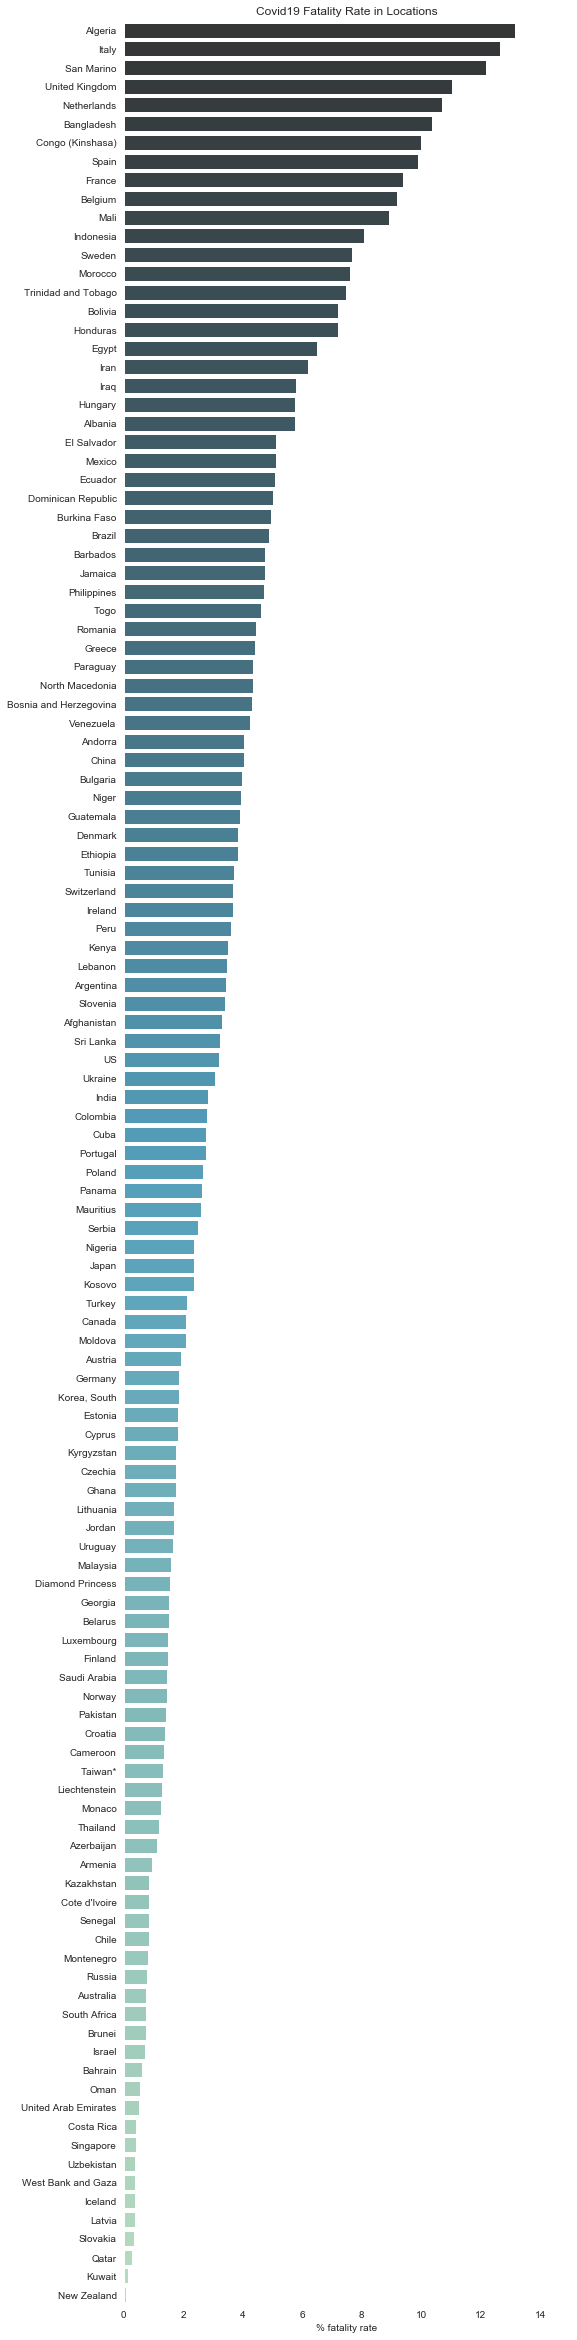

In [40]:
# plot the rank of fatality rate as horizontal bar chart

# canvas style must come first
sns.set_style("white")
# sns.set_color_codes("pastel")

# set color palette
pal = sns.color_palette("GnBu_d", len(fatalities))

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 42))

# plot the rank of fatality rate
rank = np.arange(len(fatalities))
sns.barplot(x = 'fatality_rate', y = 'location', 
            data = fatalities, label = 'Fatality Rate', palette=np.array(pal)[rank])

# Add informative axis label
ax.set(xlim=(0, 15), ylabel = '', xlabel = '% fatality rate')


# cosmetics
sns.despine(left=True, bottom=True)

# pos = np.arange(len(fatalities))

# plt.barh(pos, fatalities.fatality_rate * 100, align = 'center')
# plt.yticks(pos, fatalities.index, fontsize = 12)
# plt.xlabel('% fatality rate')

plt.title('Covid19 Fatality Rate in Locations')

In [10]:
fatalities_asc = df_country_cases.query('(Deaths > 0) & (Confirmed > 50)').sort_values(by = 'fatality_rate', ascending = True)

fatalities_asc[:25]

,Confirmed,Deaths,Recovered,Active,fatality_rate
Country_Region,,,,,
New Zealand,1160,1,241,918,0.086207
Kuwait,743,1,105,637,0.134590
Qatar,2057,6,150,1901,0.291687
Slovakia,581,2,13,566,0.344234
Latvia,548,2,16,530,0.364964
Iceland,1586,6,559,1021,0.378310
West Bank and Gaza,261,1,42,218,0.383142
Uzbekistan,520,2,30,488,0.384615
Singapore,1481,6,377,1098,0.405132


In [11]:
df_country_cases.Deaths.sum()

81865

In [12]:
# fatalitiy over all countries having more than 30 confirmed cases. 

fatality_partial = fatalities.Deaths.sum() / fatalities.Confirmed.sum()

fatality_partial

0.05745032077950438

In [13]:
# fatalitiy over all countries, regardless of how many confirmed cases and deaths. 

fatality_overall = df_country_cases.Deaths.sum() / df_country_cases.Confirmed.sum()

fatality_overall

0.05740497133432813

In [14]:
# define a function which returns the rank of the fatality

def fatality_rank( country: str, asc: bool ) -> int:
    indices = fatalities.sort_values(by = 'fatality_rate', ascending = asc).index
    return indices.get_loc(country)


In [15]:
ranks_asc = fatalities.sort_values(by = 'fatality_rate', ascending = True).index

def get_fatality_and_rank(country: str) -> pd.Series:
    fatality = fatalities.loc[country].fatality_rate

    rank_asc = ranks_asc.get_loc(country) + 1
    rank_dsc = len(ranks_asc) - rank_asc + 1

    return pd.Series({'Country_Region': country, 'fatality_rate': fatality, 'rank_asc': rank_asc, 'rank_dsc': rank_dsc})


In [16]:
# test the function get_fatality_and_rank

get_fatality_and_rank('Italy')

Country_Region      Italy
fatality_rate     12.6318
rank_asc              121
rank_dsc                2
dtype: object

In [17]:
# how do these countries score in the fatality_rate?

cols = ['Country_Region', 'fatality_rate', 'rank_asc', 'rank_dsc']
countries = ['Algeria', 'Austria', 'China', 'Germany', 'Italy', 'New Zealand', 'San Marino', 'Singapore', 'US']

df_fatality_scores = pd.DataFrame(columns = cols)

for country in countries:
    df_fatality_scores = df_fatality_scores.append(get_fatality_and_rank(country), ignore_index=True)

df_fatality_scores

,Country_Region,fatality_rate,rank_asc,rank_dsc
0,Algeria,13.147139,122,1
1,Austria,1.922620,51,72
2,China,4.031771,83,40
3,Germany,1.872510,50,73
4,Italy,12.631835,121,2
5,New Zealand,0.086207,1,122
6,San Marino,12.186380,120,3
7,Singapore,0.405132,9,114
8,US,3.210818,67,56


In [18]:
# basic statistics of the fatality
fatalities.fatality_rate.describe()

count    122.000000
mean       3.504097
std        2.972109
min        0.086207
25%        1.406202
50%        2.716879
75%        4.680679
max       13.147139
Name: fatality_rate, dtype: float64

In [19]:
# median and mode of fatality rate

fatality_median = fatalities.fatality_rate.median()
fatality_mode = fatalities.fatality_rate.mode()

print("Fatality median is {} and mode is {}".format(fatality_median, fatality_mode))


Fatality median is 2.7168785939034343 and mode is 0    4.761905
dtype: float64


In [20]:
# the mode above does not make sense, let's fix it.

# first, segment and sort fatality values into bins
bins = pd.cut(fatalities['fatality_rate'], 10, include_lowest=True)

bins

# I'd like to see the content of each bin, what to do?

Country_Region
Algeria           (11.841, 13.147]
Italy             (11.841, 13.147]
San Marino        (11.841, 13.147]
United Kingdom    (10.535, 11.841]
Netherlands       (10.535, 11.841]
                        ...       
Latvia             (0.0721, 1.392]
Slovakia           (0.0721, 1.392]
Qatar              (0.0721, 1.392]
Kuwait             (0.0721, 1.392]
New Zealand        (0.0721, 1.392]
Name: fatality_rate, Length: 122, dtype: category
Categories (10, interval[float64]): [(0.0721, 1.392] < (1.392, 2.698] < (2.698, 4.004] < (4.004, 5.311] ... (7.923, 9.229] < (9.229, 10.535] < (10.535, 11.841] < (11.841, 13.147]]

## Joined with Population data from United Nations 

Poplation is in thousand persons.  

In [21]:
population = pd.read_csv('data/WPP2019_TotalPopulationBySex.csv')
population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [22]:
# we only need the data of year 2020
pop2019 = population[population.Time == 2019]
pop2019.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
69,4,Afghanistan,2,Medium,2019,2019.5,19529.727,18512.030,38041.757,58.269
953,903,Africa,2,Medium,2019,2019.5,653513.680,654550.496,1308064.176,44.119
1837,1823,African Group,2,Medium,2019,2019.5,652644.714,653675.858,1306320.572,44.464
1988,1560,African Union,2,Medium,2019,2019.5,652949.469,653953.561,1306903.030,44.085
2139,2080,African Union: Central Africa,2,Medium,2019,2019.5,76945.498,77068.207,154013.705,29.192


In [23]:
len(pop2019)

477

### Now we need to unify the lation names of the population data and the corona data 

In [24]:
# The set of location names of the population data is much bigger than corona's. 
# So we first find out which country names are not in the population data

countryNames_covid19_only = df_country_cases[df_country_cases.index.isin(pop2019.Location) == False]

countryNames_covid19_only.index

Index(['Bolivia', 'Brunei', 'Burma', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Cote d'Ivoire', 'Diamond Princess', 'Iran', 'Korea, South', 'Kosovo',
       'Laos', 'MS Zaandam', 'Moldova', 'Russia', 'Syria', 'Taiwan*',
       'Tanzania', 'US', 'Venezuela', 'Vietnam', 'West Bank and Gaza'],
      dtype='object', name='Country_Region')

In [25]:
len(countryNames_covid19_only)

21

In [26]:
pop2019[pop2019.Location.str.contains('Pales')]

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
236754,275,State of Palestine,2,Medium,2019,2019.5,2526.35,2455.072,4981.422,827.479


In [27]:
pop2019.Location.replace({
    'Bolivia (Plurinational State of)':'Bolivia', 
    'Brunei Darussalam':'Brunei', 
    'Myanmar': 'Burma', 
    'Congo':'Congo (Brazzaville)', 
    'Democratic Republic of the Congo':'Congo (Kinshasa)', 
    'Côte d\'Ivoire':'Cote d\'Ivoire', 
    'Iran (Islamic Republic of)':'Iran', 
    'Republic of Korea':'Korea, South', 
    'Lao People\'s Democratic Republic':'Laos', 
    'Republic of Moldova':'Moldova', 
    'Russian Federation':'Russia', 
    'Syrian Arab Republic':'Syria', 
    'China, Taiwan Province of China':'Taiwan*', 
    'United Republic of Tanzania':'Tanzania', 
    'United States of America':'US', 
    'Venezuela (Bolivarian Republic of)':'Venezuela', 
    'Viet Nam':'Vietnam', 
    'State of Palestine':'West Bank and Gaza'}, inplace=True)

C:\dev\runtime\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [28]:
# drop unnecessary columns

df_pop2019 = pop2019.drop(columns=['LocID','VarID','Variant','Time','MidPeriod'])
df_pop2019.head()

,Location,PopMale,PopFemale,PopTotal,PopDensity
69,Afghanistan,19529.727,18512.030,38041.757,58.269
953,Africa,653513.680,654550.496,1308064.176,44.119
1837,African Group,652644.714,653675.858,1306320.572,44.464
1988,African Union,652949.469,653953.561,1306903.030,44.085
2139,African Union: Central Africa,76945.498,77068.207,154013.705,29.192


In [29]:
# now join the corona and population data frames

df_covid19_pop2019 = pd.merge(df_country_cases, df_pop2019, how='inner', left_on='Country_Region', right_on='Location')
df_covid19_pop2019.head()

,Confirmed,Deaths,Recovered,Active,fatality_rate,Location,PopMale,PopFemale,PopTotal,PopDensity
0,423,14,18,391,3.309693,Afghanistan,19529.727,18512.030,38041.757,58.269
1,383,22,131,230,5.744125,Albania,1466.785,1414.128,2880.913,105.143
2,1468,193,113,1162,13.147139,Algeria,21749.666,21303.388,43053.054,18.076
3,545,22,39,484,4.036697,Andorra,NaN,NaN,77.146,164.140
4,17,2,2,13,11.764706,Angola,15744.779,16080.520,31825.299,25.528


In [30]:
df_covid19_pop2019.shape

(181, 10)

In [31]:
# correlation between fatality_rate and PopDensity??

corr_fatality_popDensity = df_covid19_pop2019.fatality_rate.corr(df_covid19_pop2019.PopDensity)
corr_fatality_popDensity

-0.06885148930970185

In [32]:
corr_confirmed_popTotal = df_covid19_pop2019.Confirmed.corr(df_covid19_pop2019.PopTotal)
corr_confirmed_popTotal

0.2589723951654879

In [33]:
corr_deaths_popTotal = df_covid19_pop2019.Deaths.corr(df_covid19_pop2019.PopTotal)
corr_deaths_popTotal

0.1649066634927912